<a href="https://colab.research.google.com/github/PedroNhoura/Google-Collabs-Project/blob/main/C%C3%B3pia_de_Deep_Learning_Banco_Mercantil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning Carteira de Crédito Mercantil

##Importando Frameworks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas

##Leitura de Dados

In [ ]:
import pandas as pd
#direcionar diretorio
file_path = '/content/drive/MyDrive/Colab Notebooks/Testes/Arquivos/Mercantil/Base Case - RECUPERAÇÃO DE CRÉDITO.xlsx'

# lendo os arquivos do arquivos excel

xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

# iterar sobre cada aba para salvar cada um como dataframe
data = {}
for sheet_name in sheet_names:
    data[sheet_name] = pd.read_excel(xls, sheet_name)

# selecionando cada aba
carteira_cobranca = data['Carteira Cobrança']
atraso = data['Aging']
pagamentos = data['Pagamentos']
perfil_cliente = data['Perfil cliente']
modelagem = data['modelagem']

sheet2_data = data['Carteira Cobrança']

#salvou cada aba como dataframe

In [ ]:
carteira_cobranca

,Mês,Chave,Saldo Devedor,qtde pmts total,qtde pmts pagas,vlr pmt,valor pmt presente,Tx mensal
0,Anterior,170364,8664.200000,36,4,269.18,NaN,6.35
1,Anterior,410690,1946.033571,60,48,215.01,NaN,2.00
2,Anterior,542931,1225.548181,60,53,314.34,NaN,2.50
3,Anterior,547033,4333.395833,72,55,285.13,NaN,1.50
4,Anterior,547060,695.788181,60,52,104.80,NaN,2.50
...,...,...,...,...,...,...,...,...
20357,Próximo mês,2161082,1998.010000,12,4,363.00,NaN,17.85
20358,Próximo mês,1428363,11794.460000,96,36,273.07,NaN,3.00
20359,Próximo mês,1543514,9761.970000,36,3,370.01,NaN,7.55
20360,Próximo mês,1465293,8488.040000,34,7,330.61,NaN,5.00


In [ ]:
pagamentos.head()

,Mês,Chave,Valor recuperado
0,Anterior,69325,359.25
1,Anterior,109676,120.64
2,Anterior,146372,1675.56
3,Anterior,169155,100.00
4,Anterior,170364,800.00


In [ ]:
perfil_cliente.head()

,chave,Idade,UF,Gênero
0,170364,65,MG,F
1,410690,58,MG,F
2,542931,57,MG,F
3,547033,70,MG,F
4,547060,74,SP,F


In [ ]:
modelagem.head()

,Chave,Collection Score
0,170364,0.202772
1,410690,0.924722
2,542931,0.037231
3,547033,0.126221
4,547060,0.092397


In [ ]:
atraso.head()

,Mês,Chave,Dias atraso
0,Anterior,170364,1890
1,Anterior,410690,70
2,Anterior,542931,857
3,Anterior,547033,19
4,Anterior,547060,18


## Limpeza/Ineer Join nos dados para obter valores únicos

In [ ]:
#mudando o nome column chave
perfil_cliente.rename(columns={'chave': 'Chave'}, inplace=True)
modelagem.rename(columns={'chave': 'Chave'}, inplace=True)




In [ ]:
#escolhi o INNER merge para pegar resultados de ID de ambas as tabelas e evitar VIÉS no MACHINE LEARNING

merged_df = pd.merge(carteira_cobranca, atraso, on='Chave')
merged_df = pd.merge(merged_df, pagamentos, on='Chave')
merged_df = pd.merge(merged_df, perfil_cliente, on='Chave')
merged_df = pd.merge(merged_df, modelagem, on='Chave')
merged_df = pd.merge(merged_df, atraso, on='Chave')



<ipython-input-10-cefb517d6357>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Mês_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, atraso, on='Chave')


In [ ]:
#outer join retorna muitos valores NOT A NUMERICAL dentro do Dataframe



# merged_df = pd.merge(carteira_cobranca, atraso, on='Chave', how='outer')
# merged_df = pd.merge(merged_df, pagamentos, on='Chave', how='outer' )
# merged_df = pd.merge(merged_df, perfil_cliente, on='Chave', how='outer')
# merged_df = pd.merge(merged_df, modelagem, on='Chave', how='outer')
# merged_df = pd.merge(merged_df, atraso, on='Chave', how='outer')
# merged_df

In [ ]:
#filtrar colunas duplicadas dentro da matriz Bidimensional

colunas_remover = ['Mês_y', 'Mês_x']
merged_df = merged_df.drop(['Mês_x', 'Mês_y', 'Dias atraso_y', 'Collection Score'], axis=1)

In [ ]:
merged_df.head(30)

,Chave,Saldo Devedor,qtde pmts total,qtde pmts pagas,vlr pmt,valor pmt presente,Tx mensal,Dias atraso_x,Valor recuperado,Idade,UF,Gênero
0,170364,8664.200000,36,4,269.18,NaN,6.35,1890,800.0,65,MG,F
1,410690,1946.033571,60,48,215.01,NaN,2.00,70,600.0,58,MG,F
2,410690,1946.033571,60,48,215.01,NaN,2.00,70,600.0,58,MG,F
3,410690,1946.033571,60,48,215.01,NaN,2.00,70,600.0,58,MG,F
4,410690,1946.033571,60,48,215.01,NaN,2.00,70,600.0,58,MG,F
5,410690,1946.033571,60,48,215.01,NaN,2.00,70,600.0,58,MG,F
6,410690,1946.033571,60,48,215.01,NaN,2.00,70,600.0,58,MG,F
7,410690,1946.033571,60,48,215.01,NaN,2.00,70,600.0,58,MG,F
8,410690,1946.033571,60,48,215.01,NaN,2.00,70,600.0,58,MG,F
9,410690,1946.033571,60,48,215.01,NaN,2.00,7,600.0,58,MG,F


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5408 entries, 0 to 5407
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chave               5408 non-null   int64  
 1   Saldo Devedor       5408 non-null   float64
 2   qtde pmts total     5408 non-null   int64  
 3   qtde pmts pagas     5408 non-null   int64  
 4   vlr pmt             5408 non-null   float64
 5   valor pmt presente  0 non-null      float64
 6   Tx mensal           5408 non-null   float64
 7   Dias atraso_x       5408 non-null   int64  
 8   Valor recuperado    5408 non-null   float64
 9   Idade               5408 non-null   int64  
 10  UF                  5408 non-null   object 
 11  Gênero              5408 non-null   object 
dtypes: float64(5), int64(5), object(2)
memory usage: 549.2+ KB


In [ ]:
merged_df = merged_df.drop_duplicates()

In [ ]:
df_sorted = merged_df.sort_values('Chave', ascending=True)


In [ ]:
#valores únicos para fazer uma analise comportamental de cada cliente

df_limpo = df_sorted.drop_duplicates('Chave', keep='last')
df_limpo.head(10)

,Chave,Saldo Devedor,qtde pmts total,qtde pmts pagas,vlr pmt,valor pmt presente,Tx mensal,Dias atraso_x,Valor recuperado,Idade,UF,Gênero
463,69325,4752.470000,58,29,163.50,NaN,2.30,3087,359.25,29,CE,M
464,109676,2288.470000,24,13,210.09,NaN,3.00,1842,120.64,39,MG,F
465,146372,12370.030000,30,0,410.95,NaN,3.50,2691,1675.56,68,MG,M
309,169155,3219.596363,60,44,203.49,NaN,4.85,1540,100.00,42,SP,M
0,170364,8664.200000,36,4,269.18,NaN,6.35,1890,800.00,65,MG,F
1945,186353,3418.243636,12,3,379.45,NaN,13.85,1625,653.64,64,SP,F
310,241701,1248.810000,1,0,1248.81,NaN,8.00,2720,249.76,66,SP,M
1946,364837,877.690000,2,0,407.49,NaN,7.55,1563,814.98,64,SP,F
1,410690,1946.033571,60,48,215.01,NaN,2.00,70,600.00,58,MG,F
466,438438,1433.740000,12,0,134.68,NaN,1.50,1428,301.81,49,MG,F


##Estratégia 1 - Agrupar por Valor Pago e Pagamentos Constantes(PMTs)



>  Objetivo - Focar nos clientes que continuam pagando as parcelas (PMT) com os juros cobrados, já que é mais vantajoso um pagamento de parcela cosntante do que um pagamento único da dívida






> Percentil de Clientes que já devolveram (valor recuperado) mais de 25%, 50% , 75% do valor total do saldo devedor e que estão com um PMT (pagamentos de mesmo valor já pagas) acima da média geral.




> Desejo saber quais clientes que estão na coluna 'Chave' já pagaram mais de 25%, 50%, 75% da coluna 'Saldo Devedor' baseado na coluna 'Valor recuperado' e que estão com o valor da razão entre as colunas 'qtde pmts total' e 'qtde pmts pagas' acima da média geral entre as duas.



In [ ]:
df_limpo.head(10
              )

,Chave,Saldo Devedor,qtde pmts total,qtde pmts pagas,vlr pmt,valor pmt presente,Tx mensal,Dias atraso_x,Valor recuperado,Idade,UF,Gênero
463,69325,4752.470000,58,29,163.50,NaN,2.30,3087,359.25,29,CE,M
464,109676,2288.470000,24,13,210.09,NaN,3.00,1842,120.64,39,MG,F
465,146372,12370.030000,30,0,410.95,NaN,3.50,2691,1675.56,68,MG,M
309,169155,3219.596363,60,44,203.49,NaN,4.85,1540,100.00,42,SP,M
0,170364,8664.200000,36,4,269.18,NaN,6.35,1890,800.00,65,MG,F
1945,186353,3418.243636,12,3,379.45,NaN,13.85,1625,653.64,64,SP,F
310,241701,1248.810000,1,0,1248.81,NaN,8.00,2720,249.76,66,SP,M
1946,364837,877.690000,2,0,407.49,NaN,7.55,1563,814.98,64,SP,F
1,410690,1946.033571,60,48,215.01,NaN,2.00,70,600.00,58,MG,F
466,438438,1433.740000,12,0,134.68,NaN,1.50,1428,301.81,49,MG,F


In [ ]:
#criando coluna para calcular razao de pagamento entre valor recuperado e saldo devedor
df_limpo['Porcentagem Paga'] = (df_limpo['Valor recuperado'] / df_limpo['Saldo Devedor']) * 100

#extraindo media entre a razão de pagamentos de mesmo valor-PMT
media_razao = df_limpo['qtde pmts total'] / df_limpo['qtde pmts pagas'].mean()

#subdividindo em Percentil os grupos com 25, 50, 75 de valor pago e que estão acima de média geral de PMTs pagas
pagamento_25 = df_limpo[(df_limpo['Porcentagem Paga'] > 25) & (df_limpo['Porcentagem Paga'] <= 50) & (df_limpo['qtde pmts total'] / df_limpo['qtde pmts pagas'] > media_razao)]
pagamento_50 = df_limpo[(df_limpo['Porcentagem Paga'] > 50) & (df_limpo['Porcentagem Paga'] <= 75) & (df_limpo['qtde pmts total'] / df_limpo['qtde pmts pagas'] > media_razao)]
pagamento_75 = df_limpo[(df_limpo['Porcentagem Paga'] > 75) & (df_limpo['qtde pmts total'] / df_limpo['qtde pmts pagas'] > media_razao)]


<ipython-input-19-4ba2882816f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['Porcentagem Paga'] = (df_limpo['Valor recuperado'] / df_limpo['Saldo Devedor']) * 100


In [ ]:
pagamento_25

,Chave,Saldo Devedor,qtde pmts total,qtde pmts pagas,vlr pmt,valor pmt presente,Tx mensal,Dias atraso_x,Valor recuperado,Idade,UF,Gênero,Porcentagem Paga
476,634511,1656.460000,6,0,273.44,NaN,1.96,2287,700.00,62,MG,M,42.258793
484,738201,804.713000,72,7,12.56,NaN,2.02,1662,246.00,71,RS,F,30.569905
2047,1122615,1001.064090,2,0,481.00,NaN,7.50,841,278.00,70,SP,M,27.770450
411,1122896,902.440000,2,0,427.49,NaN,5.50,813,408.77,55,SP,M,45.296086
412,1122897,901.610000,2,0,427.49,NaN,5.50,813,408.40,55,SP,M,45.296747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,2216787,258.083076,2,1,362.17,NaN,6.50,20,125.93,40,MG,F,48.794366
4945,2217095,580.454090,2,0,336.32,NaN,5.50,111,240.01,82,BA,M,41.348662
4946,2217099,1178.499500,36,3,120.91,NaN,16.50,109,483.64,65,SP,F,41.038626
4947,2217598,435.409285,2,0,208.66,NaN,7.50,101,160.00,63,SP,F,36.747034


In [ ]:
pagamento_50

,Chave,Saldo Devedor,qtde pmts total,qtde pmts pagas,vlr pmt,valor pmt presente,Tx mensal,Dias atraso_x,Valor recuperado,Idade,UF,Gênero,Porcentagem Paga
1947,442565,1328.850000,1,0,1328.85,NaN,9.00,1491,670.47,70,SP,M,50.454905
467,456675,1303.190000,1,0,1303.19,NaN,9.00,1475,700.00,67,CE,F,53.714347
2046,1122449,581.440000,2,0,314.00,NaN,5.50,826,328.38,49,MG,M,56.477023
165,1128924,618.890000,2,0,299.95,NaN,5.00,838,321.42,71,MG,M,51.934916
591,1224589,330.710000,2,1,257.87,NaN,14.50,717,225.71,54,SP,M,68.250129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,2212611,1613.442500,2,0,782.25,NaN,5.50,97,1195.97,76,MG,F,74.125356
5284,2214055,2808.890000,3,0,852.18,NaN,9.99,82,2029.64,53,SP,M,72.257725
4908,2215482,927.904615,2,1,1298.64,NaN,5.50,20,470.98,59,MG,F,50.757372
3613,2215807,735.375000,2,0,357.31,NaN,7.00,87,542.64,63,SP,M,73.790923


In [ ]:
pagamento_75

,Chave,Saldo Devedor,qtde pmts total,qtde pmts pagas,vlr pmt,valor pmt presente,Tx mensal,Dias atraso_x,Valor recuperado,Idade,UF,Gênero,Porcentagem Paga
1946,364837,877.690000,2,0,407.49,NaN,7.55,1563,814.98,64,SP,F,92.855108
1961,766136,3914.270000,12,5,542.44,NaN,7.20,2376,4111.81,44,MG,M,105.046663
326,766142,2695.670000,1,0,2695.67,NaN,8.00,2370,5446.00,44,MG,M,202.027696
413,1123133,617.418571,2,0,299.55,NaN,5.50,820,560.16,66,SP,F,90.726134
2083,1127268,422.742272,2,0,246.94,NaN,5.50,832,373.35,56,MG,M,88.316221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,2216378,766.260000,2,1,759.38,NaN,7.00,4,759.38,67,SP,M,99.102132
4944,2216455,100.440000,1,0,100.44,NaN,9.00,153,133.82,69,BA,M,133.233771
3615,2216662,816.185000,2,1,796.13,NaN,7.50,17,827.43,67,SP,F,101.377751
5390,2217662,221.131538,2,1,368.48,NaN,7.50,20,175.24,51,SP,F,79.246950


In [ ]:
import os

diretorio = '/content/drive/MyDrive/Colab Notebooks/Testes/Arquivos/Mercantil'
if not os.path.exists(diretorio):
    os.makedirs(diretorio)


##Graph Metric Insights

In [ ]:
# Definindo os rótulos dos grupos de barras
grupos = ['Pagamento >25%', 'Pagamento >50%', 'Pagamento >75%']

# Obtendo os valores para cada grupo
valores_pagamento_25 = pagamento_25.shape[0]
valores_pagamento_50 = pagamento_50.shape[0]
valores_pagamento_75 = pagamento_75.shape[0]

# Criando o gráfico de barras interativo
fig = go.Figure(data=[go.Bar(x=grupos, y=[valores_pagamento_25, valores_pagamento_50, valores_pagamento_75])])

# Definindo o título e os rótulos dos eixos
fig.update_layout(title='Clientes que Pagaram Saldo Devedor por Porcentagem',
                  xaxis_title='Porcentagem de Pagamento',
                  yaxis_title='Quantidade de Clientes')

# Exibindo o gráfico interativo
fig.show()


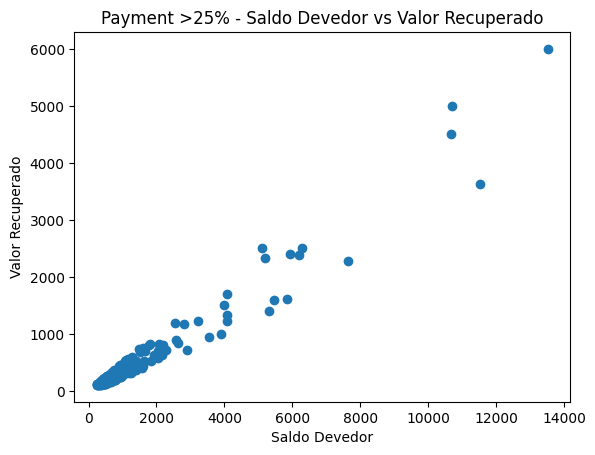

In [ ]:

plt.scatter(pagamento_25['Saldo Devedor'], pagamento_25['Valor recuperado'])
plt.title('Payment >25% - Saldo Devedor vs Valor Recuperado')
plt.xlabel('Saldo Devedor')
plt.ylabel('Valor Recuperado')
plt.show()


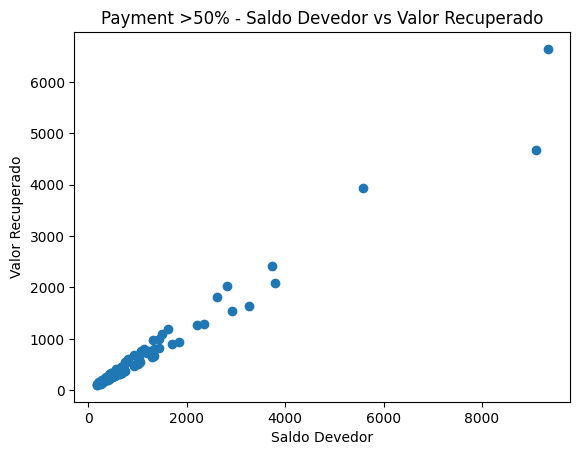

In [ ]:

plt.scatter(pagamento_50['Saldo Devedor'], pagamento_50['Valor recuperado'])
plt.title('Payment >50% - Saldo Devedor vs Valor Recuperado')
plt.xlabel('Saldo Devedor')
plt.ylabel('Valor Recuperado')
plt.show()

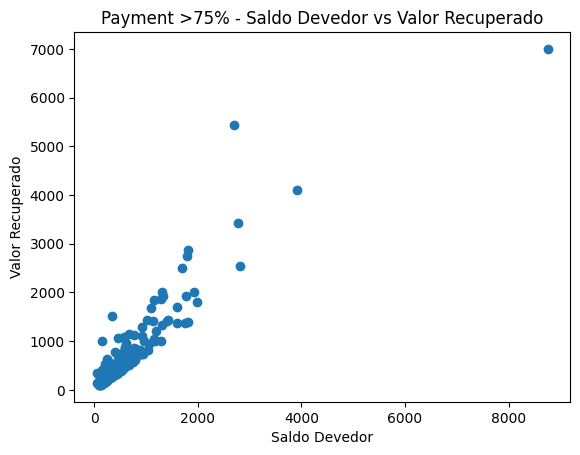

In [ ]:
plt.scatter(pagamento_75['Saldo Devedor'], pagamento_75['Valor recuperado'])
plt.title('Payment >75% - Saldo Devedor vs Valor Recuperado')
plt.xlabel('Saldo Devedor')
plt.ylabel('Valor Recuperado')
plt.show()

In [ ]:
#https://plotly.com/python/3d-scatter-plots/
fig1 = px.scatter_3d(pagamento_25, x='Saldo Devedor', y='Dias atraso_x', z='Valor recuperado')
fig1.update_layout(
    title='Payment >25% - Saldo Devedor, Dias de Atraso e Valor Recuperado',
    scene=dict(xaxis_title='Saldo Devedor',
               yaxis_title='Dias de Atraso',
               zaxis_title='Valor Recuperado'),
    template="plotly_dark"
)


fig1.show()



In [ ]:
fig2 = px.scatter_3d(pagamento_50, x='Saldo Devedor', y='Dias atraso_x', z='Valor recuperado')
fig2.update_layout(
    title='Payment >50% - Saldo Devedor, Dias de Atraso e Valor Recuperado',
    scene=dict(xaxis_title='Saldo Devedor',
               yaxis_title='Dias de Atraso',
               zaxis_title='Valor Recuperado'),
    template="plotly_dark"
)


fig2.show()

In [ ]:
fig3 = px.scatter_3d(pagamento_75, x='Saldo Devedor', y='Dias atraso_x', z='Valor recuperado')
fig3.update_layout(
    title='Payment >75% - Saldo Devedor, Dias de Atraso e Valor Recuperado',
    scene=dict(xaxis_title='Saldo Devedor',
               yaxis_title='Dias de Atraso',
               zaxis_title='Valor Recuperado'),
    template="plotly_dark"
)
fig3.show()



> **Diagnóstico** - Todos os 3 grupos que possuem dívidas menores em relacão ao total do valor de dívida , possuem tendência estatistica comportamental de retornarem **uma porcentagem maior da dívida** com **menor tempo de atraso**.


> Enquanto que quanto maior a dívida, maior tendência de atraso nos dias e menor valor recuperado.




> **Recomendação** - Campanhas de negociação de crédito focadas em um volume maior de dívidas pequenas, ganhando performance em volume de dívidas quitadas. Para suprimir este volume alto de pequenas cobranças, pode-se anexar disparos automáticos de email e mensagens no aplicativos associados as contas que possuem esse perfil pelo ID do cliente.




##Salvando dados

In [ ]:
# import plotly.offline as offline

# # exportar gráfico 3D Scatter Plot para uma página HTML
# html1 = offline.plot(fig1, filename='/content/drive/MyDrive/Colab Notebooks/Testes/Arquivos/Mercantil/valores_pagamento_25.html', auto_open=False)


# html2 = offline.plot(fig2, filename='/content/drive/MyDrive/Colab Notebooks/Testes/Arquivos/Mercantil/valores_pagamento_50.html', auto_open=False)


# html3 = offline.plot(fig3, filename='/content/drive/MyDrive/Colab Notebooks/Testes/Arquivos/Mercantil/valores_pagamento_75.html', auto_open=False)


In [ ]:
# salvar1 = pagamento_25.to_csv('/content/drive/MyDrive/Colab Notebooks/Testes/Arquivos/Mercantil/valores_pagamento_25.csv', index=False)

# # Salvar valores_pagamento_50 como arquivo CSV
# salvar2 = pagamento_50.to_csv('/content/drive/MyDrive/Colab Notebooks/Testes/Arquivos/Mercantil/valores_pagamento_50.csv', index=False)

# # Salvar valores_pagamento_75 como arquivo CSV
# salvar3 = pagamento_75.to_csv('/content/drive/MyDrive/Colab Notebooks/Testes/Arquivos/Mercantil/valores_pagamento_75.csv', index=False)

In [ ]:
# sheet_id = '1nRt8eRiESMswf6Qdvm5TdZoowF0f1KH4oVOfBObx56U'



# worksheet_pg1 = 'Acima de 25%'
# worksheet_pg2 = 'Acima de 50%'
# worksheet_pg3 = 'Acima de 75%'

# auth.authenticate_user()
# creds, _  = default()
# gc = gspread.authorize(creds)
# sh = gc.open_by_key(sheet_id)


# sh.worksheets()
# worksheet = sh.worksheet(worksheet_pg1)

##Estratégia 2 - Machine Learning - Supervisionado



> Método de Machine Learning TreeClassification para saber se o cliente é um bom pagador ou não



Irei utilizar todas as dimensões de dados exceto: 'Chave', 'valor pmt presente', 'UF', 'Gênero'


In [ ]:
df_limpo

,Chave,Saldo Devedor,qtde pmts total,qtde pmts pagas,vlr pmt,valor pmt presente,Tx mensal,Dias atraso_x,Valor recuperado,Idade,UF,Gênero,Porcentagem Paga
463,69325,4752.470000,58,29,163.50,NaN,2.30,3087,359.25,29,CE,M,7.559227
464,109676,2288.470000,24,13,210.09,NaN,3.00,1842,120.64,39,MG,F,5.271644
465,146372,12370.030000,30,0,410.95,NaN,3.50,2691,1675.56,68,MG,M,13.545319
309,169155,3219.596363,60,44,203.49,NaN,4.85,1540,100.00,42,SP,M,3.105979
0,170364,8664.200000,36,4,269.18,NaN,6.35,1890,800.00,65,MG,F,9.233397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,2217696,3952.480454,36,3,249.83,NaN,6.00,60,487.61,60,MG,F,12.336810
5391,2217702,1990.835000,6,2,481.84,NaN,17.85,57,1800.00,73,MG,M,90.414324
3682,2217804,532.408888,2,0,493.14,NaN,7.00,88,141.57,44,MS,F,26.590465
4949,2217807,1544.409545,12,7,363.00,NaN,17.85,50,164.21,64,SP,F,10.632542


In [ ]:
lista_colunas_excluir = ['Chave', 'valor pmt presente', 'UF', 'Gênero', 'Porcentagem Paga']
df_machine = df_limpo.drop(lista_colunas_excluir, axis=1)

In [ ]:
df_machine.head(15)

,Saldo Devedor,qtde pmts total,qtde pmts pagas,vlr pmt,Tx mensal,Dias atraso_x,Valor recuperado,Idade
463,4752.470000,58,29,163.50,2.30,3087,359.25,29
464,2288.470000,24,13,210.09,3.00,1842,120.64,39
465,12370.030000,30,0,410.95,3.50,2691,1675.56,68
309,3219.596363,60,44,203.49,4.85,1540,100.00,42
0,8664.200000,36,4,269.18,6.35,1890,800.00,65
1945,3418.243636,12,3,379.45,13.85,1625,653.64,64
310,1248.810000,1,0,1248.81,8.00,2720,249.76,66
1946,877.690000,2,0,407.49,7.55,1563,814.98,64
1,1946.033571,60,48,215.01,2.00,70,600.00,58
466,1433.740000,12,0,134.68,1.50,1428,301.81,49


In [ ]:
# Adicionar a coluna 'Pagou Parcelas'

df_machine['Pagou Parcelas'] = np.where(df_machine['qtde pmts pagas'] < (0.5 * df_machine['qtde pmts total']), 0, 1)


In [ ]:
df_machine.head(10)

,Saldo Devedor,qtde pmts total,qtde pmts pagas,vlr pmt,Tx mensal,Dias atraso_x,Valor recuperado,Idade,Pagou Parcelas
463,4752.470000,58,29,163.50,2.30,3087,359.25,29,1
464,2288.470000,24,13,210.09,3.00,1842,120.64,39,1
465,12370.030000,30,0,410.95,3.50,2691,1675.56,68,0
309,3219.596363,60,44,203.49,4.85,1540,100.00,42,1
0,8664.200000,36,4,269.18,6.35,1890,800.00,65,0
1945,3418.243636,12,3,379.45,13.85,1625,653.64,64,0
310,1248.810000,1,0,1248.81,8.00,2720,249.76,66,0
1946,877.690000,2,0,407.49,7.55,1563,814.98,64,0
1,1946.033571,60,48,215.01,2.00,70,600.00,58,1
466,1433.740000,12,0,134.68,1.50,1428,301.81,49,0


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separar variáveis previsoras e variável objetivo
features = df_machine.drop('Pagou Parcelas', axis=1) #['Pagou Parcelas','qtde pmts pagas']
target = df_machine['Pagou Parcelas']

# separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# instanciar o modelo que desejo usar, para receber os produtos
clf = DecisionTreeClassifier()

# treinar o modelo
clf.fit(X_train, y_train)

# fazer a previ da var objetivo
y_pred = clf.predict(X_test)

# valores de acurácia
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Taxa de acertos do modelo:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Taxa de acertos do modelo: 0.9796954314720813
Precisão: 0.965034965034965
Recall: 0.9787234042553191
F1-score: 0.971830985915493


Accuracy: 0.9771573604060914
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       253
           1       0.96      0.97      0.97       141

    accuracy                           0.98       394
   macro avg       0.97      0.98      0.98       394
weighted avg       0.98      0.98      0.98       394



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



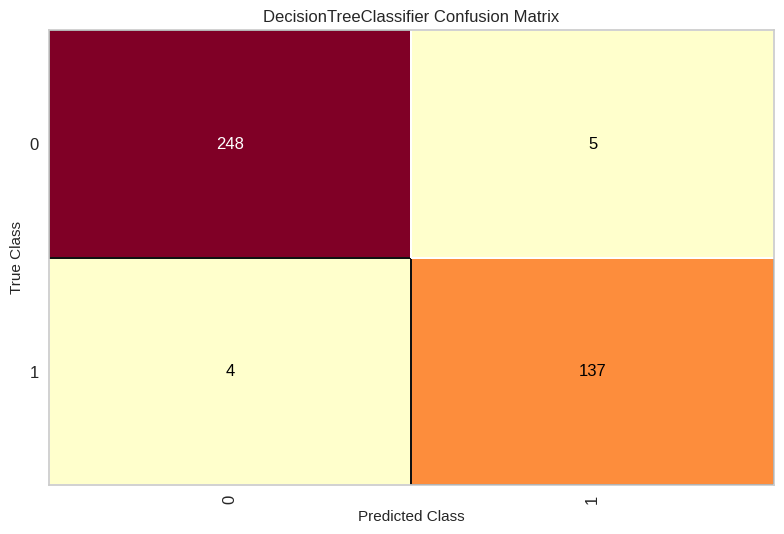

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

#definindo as variáves para matriz de confusao
X = df_machine.drop('Pagou Parcelas', axis=1)
y = df_machine['Pagou Parcelas']

# dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#criando a arvore
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# fazendo previsoes
y_pred = clf.predict(X_test)

# calculando acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# gerar relatorio
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

#criar matriz com classes 0 e 1
cm = ConfusionMatrix(clf, classes=[0, 1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

#desenhar matriz
cm.poof()


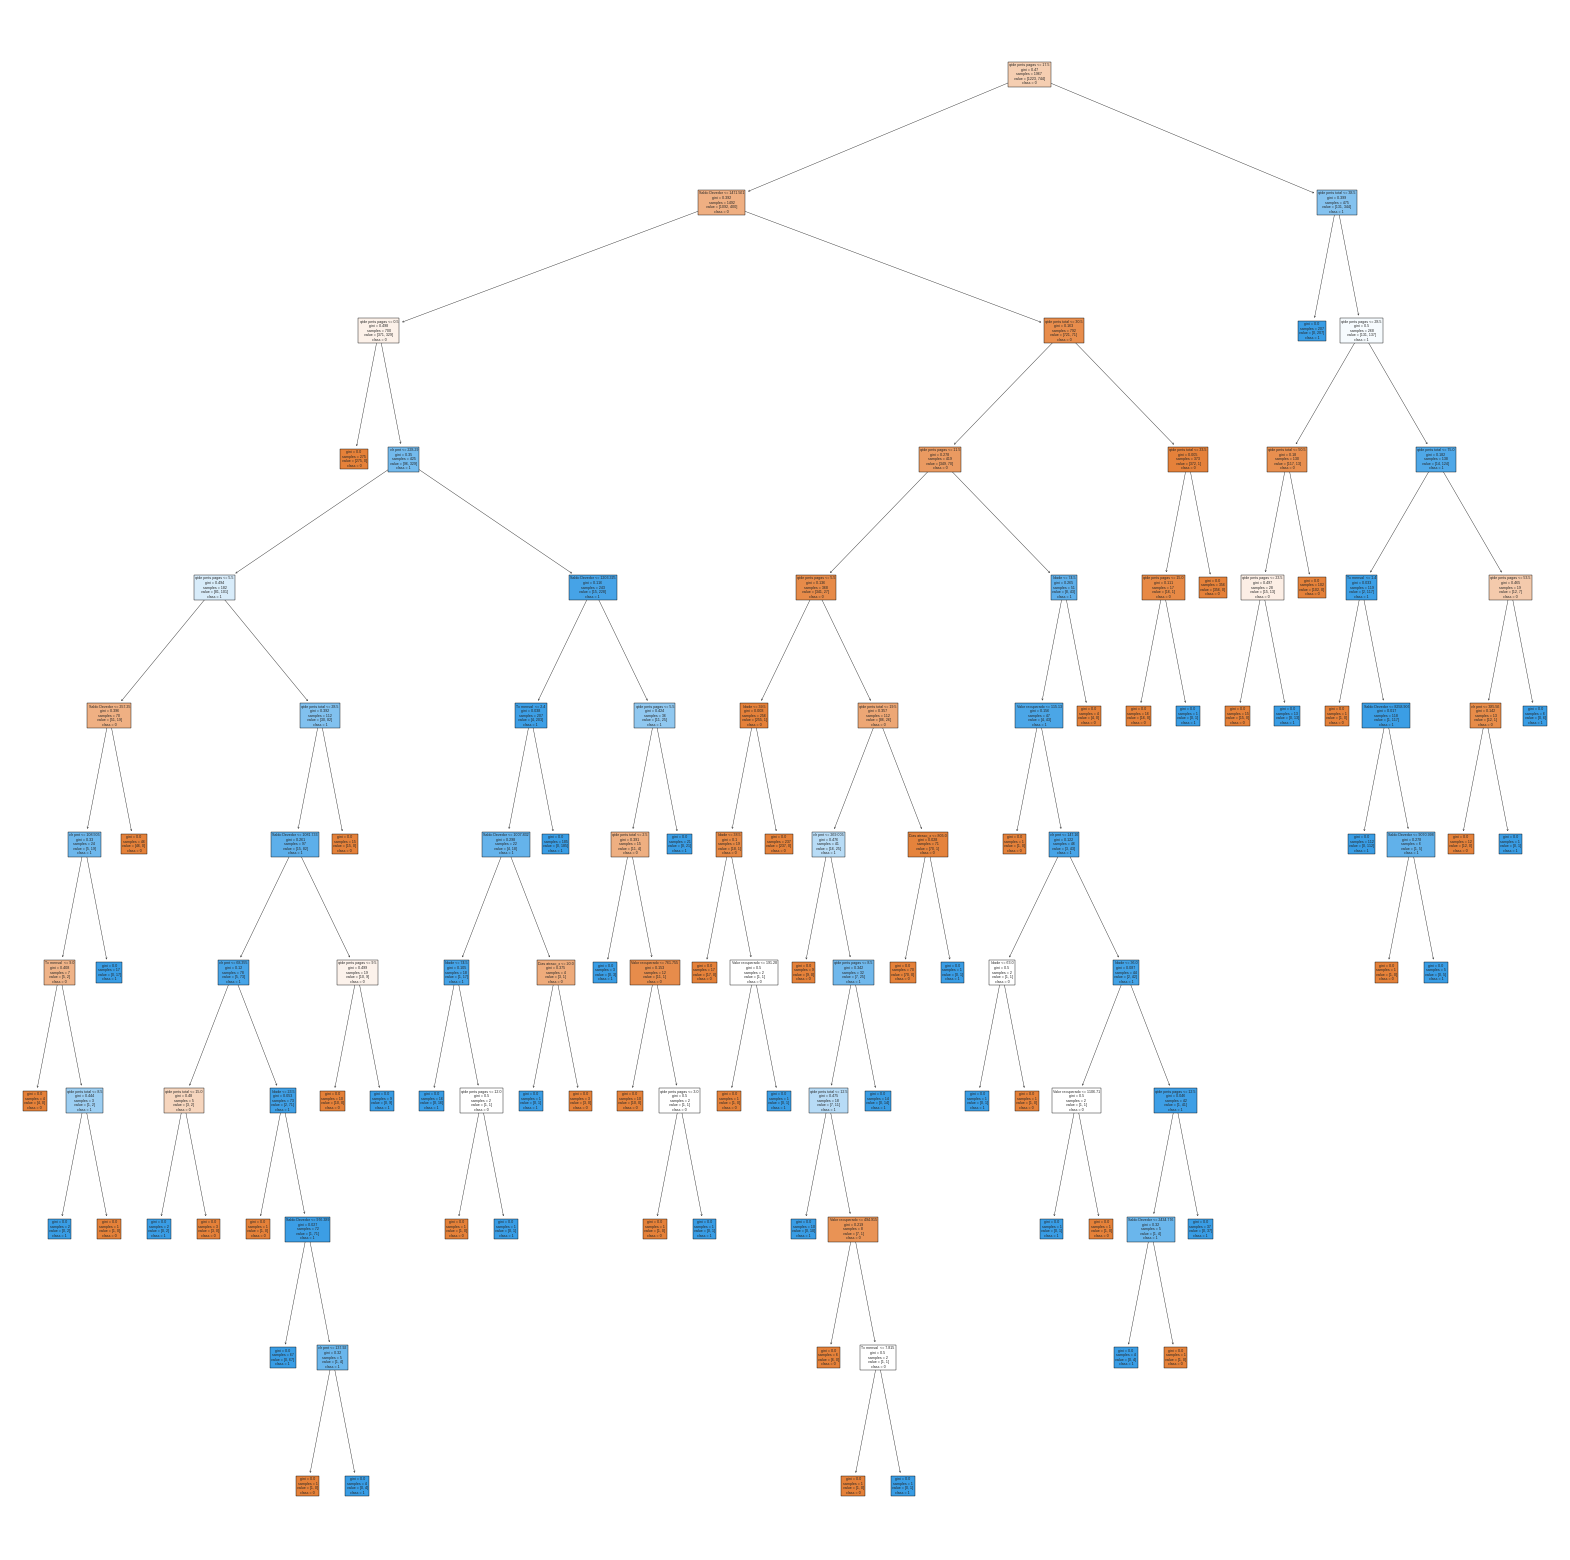

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Define the features and target variable
previsores = ['Saldo Devedor', 'qtde pmts total', 'qtde pmts pagas', 'vlr pmt', 'Tx mensal ', 'Dias atraso_x', 'Valor recuperado', 'Idade']
target = 'Pagou Parcelas'

# Subset the input data X to include only the selected features
X_subset = X[previsores]

# Create an instance of the DecisionTreeClassifier with the desired parameters
arvore_credit = tree.DecisionTreeClassifier()
arvore_credit.fit(X_subset, y)

# Plot the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0', '1'], filled=True)
#Salvando figura em PDF
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Testes/Arquivos/Mercantil/arvore_credit.pdf')
plt.show()



### Fazendo um previsão



> Prever se um cliente irá pagar mais da metade das parcelas (1) ou menos da metade (0)



In [ ]:
Saldo_Devedor = input('Digite o valor do Saldo Devedor:')
qtde_pmts_total = input('Digite quantas parcelas totais:')
qtde_pmts_pagas = input('Digite quantas parcelas já pagas:')
vlr_pmt = input('Digite o valor da Parcela:')
Tx_mensal = input('Digite o valor do Taxa Mensal:')
Dias_atraso_x = input('Digite os dias de Atraso:')
Valor_recuperado= input('Digite o valor do Valor_recuperado:')
Idade = input('Digite o valor da Idade:')

#COLOQUE OS NOVOS VALORES PARA SABER SE CLIENTE TERÁ BONS INDICES
new_data = pd.DataFrame({
    'Saldo Devedor': [Saldo_Devedor],
    'qtde pmts total': [qtde_pmts_total],
    'qtde pmts pagas': [qtde_pmts_pagas],
    'vlr pmt': [vlr_pmt],
    'Tx mensal ': [Tx_mensal],
    'Dias atraso_x': [Dias_atraso_x],
    'Valor recuperado': [Valor_recuperado],
    'Idade': [Idade]
})

# Nova previsao
prediction = clf.predict(new_data)



predicted_value = prediction[0]
if predicted_value == 0:
    print('Este novo cliente possui 95% de chance de ser inadimplente com as parcelas (<=50%)')
elif predicted_value == 1:
    print('Este novo cliente possui 95% de chance de ser adimplente com as parcelas (>50%)')




KeyboardInterrupt: ignored